In [1]:
# Import all the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

In [2]:
# Load the Dataset

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("data.csv")

Saving data.csv to data (1).csv


In [3]:
# Cleaning the dataset

df.drop(columns=["id", "Unnamed: 32"], inplace=True)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})  # Encode target

In [4]:
# Features & Target

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [5]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Model Training

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# Predictions

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



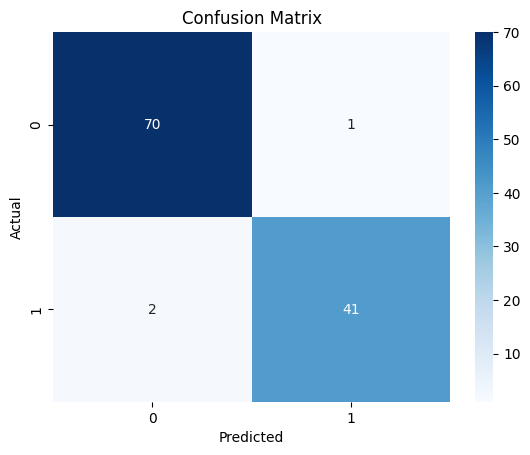

Precision: 0.98
Recall: 0.95
ROC-AUC Score: 0.9974


In [9]:
# Evaluation

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

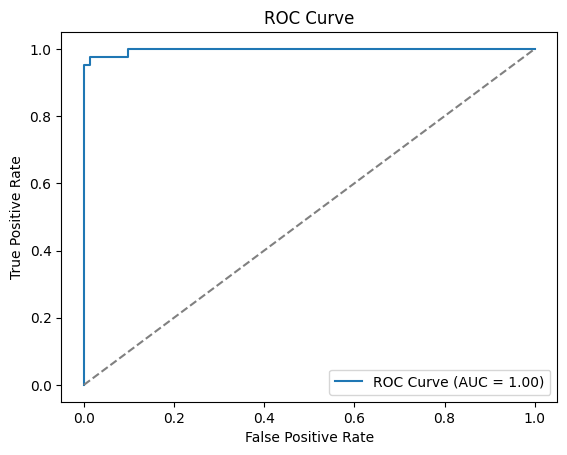

In [10]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [11]:
# Threshold Tuning Example

threshold = 0.4
y_pred_custom = (y_prob >= threshold).astype(int)
print(f"\nClassification Report with threshold = {threshold}")
print(classification_report(y_test, y_pred_custom))


Classification Report with threshold = 0.4
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



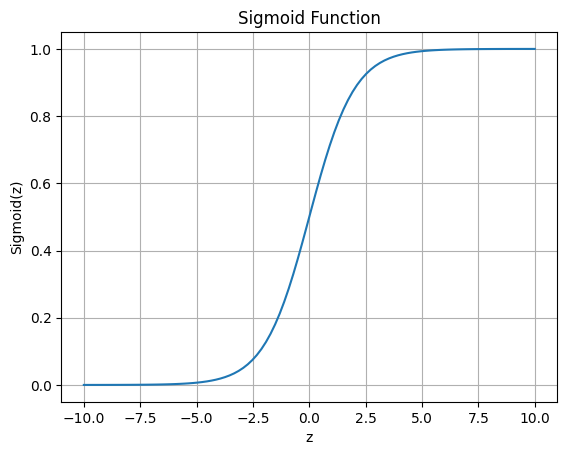

In [12]:
# Sigmoid Function Plot

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_values = np.linspace(-10, 10, 100)
plt.plot(z_values, sigmoid(z_values))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()